<h1>MNIST Classification using CNNs</h1>

---



# Importing Keras Modules


In [ ]:
#Importing important modules
import tensorflow
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Loading the Dataset

<h3>Download train and test sets of  MNIST dataset</h3>

In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


<h4>Visualizing the dataset</h4>

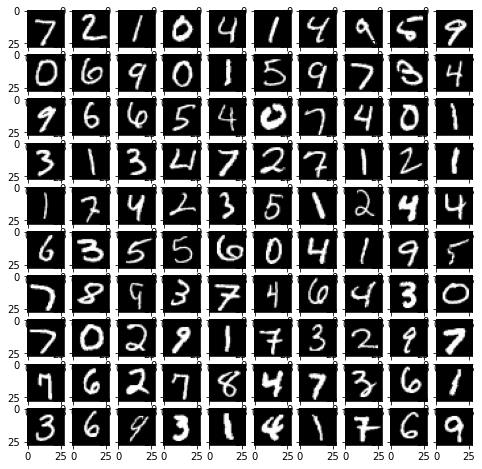

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
w=8
h=8
fig=plt.figure(figsize=(w, h))
columns = 10
rows = 10
for i in range(0, columns*rows):
    img = x_test[i]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
y_test[0:100]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4,
       6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9], dtype=uint8)

<h3>Reshape train and test sets into shapes compatible with keras models</h3>

<h4>Keras expects data to be in the format (N_E.N_H,N_W,N_C)  N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.</h4>


In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
# input image dimensions
img_rows, img_cols = 28, 28

#Keras expects data to be in the format (N_E.N_H,N_W,N_C)
#N_E = Number of Examples, N_H = height, N_W = Width, N_C = Number of Channels.
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

<h3>Pre-processing the dataset</h3>
<h4>Normalizing the input</h4>

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalizing the input
x_train /= 255.0
x_test /= 255.0
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
batch_size = 128
num_classes = 10
epochs = 12

In [ ]:
print(y_train[0])

5


In [ ]:
y_train.shape

(60000,)

<h4>Convert Labels from digits to one hot vectors</h4>

In [ ]:
# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Building the CNN 

<h4>Define the layers of model</h4>

In [ ]:
#Instantiate an empty model
model = Sequential()

# C1 Convolutional Layer
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation="relu", input_shape=input_shape, padding="same"))

# S2 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding="valid"))

# C3 Convolutional Layer
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation="relu", padding="valid"))

# S4 Pooling Layer
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

# C5 Fully Connected Convolutional Layer
model.add(Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation="relu", padding="valid"))
#Flatten the CNN output so that we can connect it with fully connected layers
model.add(Flatten())

# FC6 Fully Connected Layer
model.add(Dense(84, activation="relu"))

#Output Layer with softmax activation
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 27, 27, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 11, 11, 16)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 5880)              0

<h4>Setting Optimizer and Loss function for training</h4>

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

#To use adam optimizer for learning weights with learning rate = 0.001
#optimizer = Adam(learning_rate=0.001)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer="SGD",
              metrics=['accuracy'])

# Training the CNN 

<h4>Initializing Early stopping and Model chekpoint callbacks </h4>

In [ ]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('mnist_lenet_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

<h4>Fit the model to the dataset</h4>

In [ ]:
#Training on the dataset and adding the all the callbacks to the fit function.
#Once the training starts, results start appearing on Tensorboard after 1 epoch
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[early_stopping,model_checkpoint])

Epoch 1/12
469/469 [==============================] - ETA: 0s - loss: 1.2969 - accuracy: 0.6106
Epoch 1: val_loss improved from inf to 0.35887, saving model to mnist_cnn_checkpoint_01_loss0.3589.h5
469/469 [==============================] - 15s 13ms/step - loss: 1.2969 - accuracy: 0.6106 - val_loss: 0.3589 - val_accuracy: 0.8928
Epoch 2/12
464/469 [============================>.] - ETA: 0s - loss: 0.2654 - accuracy: 0.9223
Epoch 2: val_loss improved from 0.35887 to 0.19530, saving model to mnist_cnn_checkpoint_02_loss0.1953.h5
469/469 [==============================] - 5s 12ms/step - loss: 0.2642 - accuracy: 0.9227 - val_loss: 0.1953 - val_accuracy: 0.9395
Epoch 3/12
465/469 [============================>.] - ETA: 0s - loss: 0.1715 - accuracy: 0.9486
Epoch 3: val_loss improved from 0.19530 to 0.12756, saving model to mnist_cnn_checkpoint_03_loss0.1276.h5
469/469 [==============================] - 6s 12ms/step - loss: 0.1713 - accuracy: 0.9487 - val_loss: 0.1276 - val_accuracy: 0.9622
E

# Evaluating the CNN

<h4>Evaluate trained model on the test set</h4>

In [ ]:
#Testing the model on test set
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 5ms/step - loss: 0.0549 - accuracy: 0.9827
Test loss: 0.05487079545855522
Test accuracy: 0.982699990272522


<h4>Visualizing some predictions</h4>

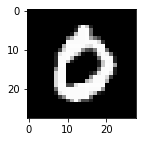

0


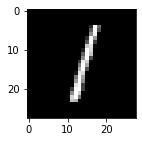

1


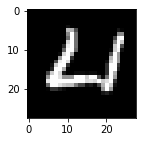

4


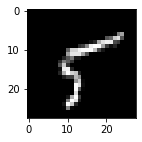

5


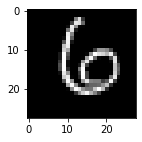

6


In [ ]:
import numpy as np

plt.figure(figsize=(2,2))
plt.imshow(x_test[3].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[3].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[2].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[2].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[33].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[33].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[59].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[59].reshape(1,28,28,1))))


plt.figure(figsize=(2,2))
plt.imshow(x_test[100].reshape(28,28),cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[100].reshape(1,28,28,1))))

# Saving the CNN

<h4>Save the trained weights and model in h5 files</h4>

In [ ]:
#Set the path where you want to store the model and weights. 
model.save('/content/gdrive/MyDrive/Colab Notebooks/CNN/cnn_mnist_lenet.h5')
model.save_weights('/content/gdrive/MyDrive/Colab Notebooks/CNN/cnn_mnist_lenet_weights.h5')